## Exploratory data analysis, Visualization and Q. -answering  Pipeline Accidents in the US , 2010 On  - 

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import os,sys
import copy
from pipelineAccidentAnalyser import CrudePipeLineAnalysis#, time_cost_model_n_plot, density_mix, plot_correlation_map
from pandas.errors import MergeError, EmptyDataError, ParserError, \
    InvalidIndexError, DtypeWarning, DuplicateLabelError

## Create an instance of the pipeline analysis class
Oilpipeline_1 = CrudePipeLineAnalysis()

# a constant when looking at data frames/series ahead...
MEDIUM_ROW_NUMS = 25

In [5]:
# name your csv file "database.csv" and place it in the current working directory,

# interactively add your .csv/.xlsx filename (without any pathname - but have it located 
# in this folder)
input_file = input()
data_file = input_file

try:
    data = pd.read_csv(data_file)
except FileNotFoundError as e:
    print("Excel file not found " + str(e) + ' -- please ensure The file is in your current working directory, now exiting program...')
    #return False

except IOError as e:
    print("invalid data format encountered in file " + str(e) + ' -- please ensure The file content is in the corre3ct format, now exiting program...')
    #return False

except Exception as err:
    print('Specific error is : ' + str(err))
    #return False


pd.set_option("display.max_columns", None)
# take a look at the data
data.head(MEDIUM_ROW_NUMS)


database.csv


,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.00,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.00,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.00,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.00,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.00,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
5,20100021,17161,2010,1/8/2010 11:38 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",NaN,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,NECHE,PEMBINA,ND,48.99555,-97.52554,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,3784.00,0.0,1547.00,2237.00,NO,NO,YES,1/8/2010 23:41,1/13/2010 9:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76940.0,167775.0,150000.0,1800000.0,2000000.0,0.0,4194715
6,20110036,18052,2010,1/9/2010 12:15 AM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",NaN,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",GASOLINE (NON-ETHANOL),NaN,GALENA PARK,HARRIS,TX,29.43050,-95.12010,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,35.00,0.0,30.00,5.00,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,400.0,0.0,0.0,70000.0,0.0,70400
7,20100255,18584,2010,1/9/2010 1:12 AM,12624,MOBIL CORP,HULL STATION,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,HULL,LIBERTY,TX,30.08533,-94.38050,NATURAL FORCE DAMAGE,TEMPERATURE,0.24,0.0,0.00,0.24,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,13.0,0.0,0.0,0.0,0.0,413
8,20100261,18050,2010,1/10/2010 7:46 PM,26041,"KINDE

In [6]:
Oilpipeline_1.do_checks_on_dataframe(data)


 
 ***********************************************************
The dimensions of the tabular data are :(2795, 48)

 
 ***********************************************************

 
 ***********************************************************
 *********** THE DATAFRAME"S SUMMARY STATISTICS ARE :   **********

 
 ***********************************************************
       Report Number  Supplemental Number  Accident Year   Operator ID  \
count   2.795000e+03          2795.000000    2795.000000   2795.000000   
mean    2.013293e+07         19433.319499    2013.187835  21388.476565   
std     1.982098e+04          1724.815370       1.972102  12430.973428   
min     2.010000e+07         15072.000000    2010.000000    300.000000   
25%     2.012004e+07         17978.500000    2012.000000  11169.000000   
50%     2.013037e+07         19502.000000    2013.000000  26041.000000   
75%     2.015023e+07         20996.500000    2015.000000  31618.000000   
max     2.017003e+07         22049

True

In [7]:
data_good_cols = data.drop(columns=['Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All Fatalities'])


In [8]:
# before accessing columns, ensure no errors are made by assigning variables to the correct strings 
# (this will @ least reduce human error):
#data.columns;

Report_Number      = 'Report Number'
Accident_Year      = 'Accident Year'
Accident_Date_Time = 'Accident Date/Time'
Pipeline_Type      = 'Pipeline Type'
Liquid_Type        = 'Liquid Type'                 
Liquid_Subtype     = 'Liquid Subtype'                 
Liquid_Name        = 'Liquid Name'                
Cause_Category     = 'Cause Category'                 
Cause_Subcategory  = 'Cause Subcategory'                
Unintentional_Release_Barrels = 'Unintentional Release (Barrels)'                 
Intentional_Release_Barrels   = 'Intentional Release (Barrels)'                
Liquid_Recovery_Barrels       = 'Liquid Recovery (Barrels)'                
Net_Loss_Barrels   = 'Net Loss (Barrels)'                
Liquid_Ignition    = 'Liquid Ignition'                
Liquid_Explosion   = 'Liquid Explosion'                 
All_Injuries       = 'All Injuries'                
All_Fatalities     = 'All Fatalities'      
All_Costs          = 'All Costs'       

In [9]:
# Store a list of what I initially consider the more importnat columns for brevity later to possibly use...
important_cols = [ Report_Number,
Accident_Year ,
 Accident_Date_Time,
Pipeline_Type  ,
Liquid_Type    ,
 Liquid_Subtype , 
 Liquid_Name    , 
 Cause_Category ,
Cause_Subcategory,
Net_Loss_Barrels,
Liquid_Ignition ,
Liquid_Explosion,
All_Costs]

In [10]:
# make a copy(non shallow so altering the copied data struct doesn indirectly alter the original)
# of the data filtered as you wish
# also filter out the non - numeric data so we can encode and do a fuller correlation map
try:
    init_non_numeric_index  = 3
    final_non_numeric_index = 9
    relevant_data = copy.deepcopy(data[ important_cols])
    if data.shape[1] >= 9:
        relevant_data_non_numeric = relevant_data[ important_cols[init_non_numeric_index:final_non_numeric_index]]
except (KeyError,IndexError, EmptyDataError, InvalidIndexError) as err:
    print("Got an error trying to filter columns and indices here , specific error(s) is , \
          copying the original in the worst case")
    print(err)
    relevant_data = data
    pass

relevant_data_non_numeric.shape;


True

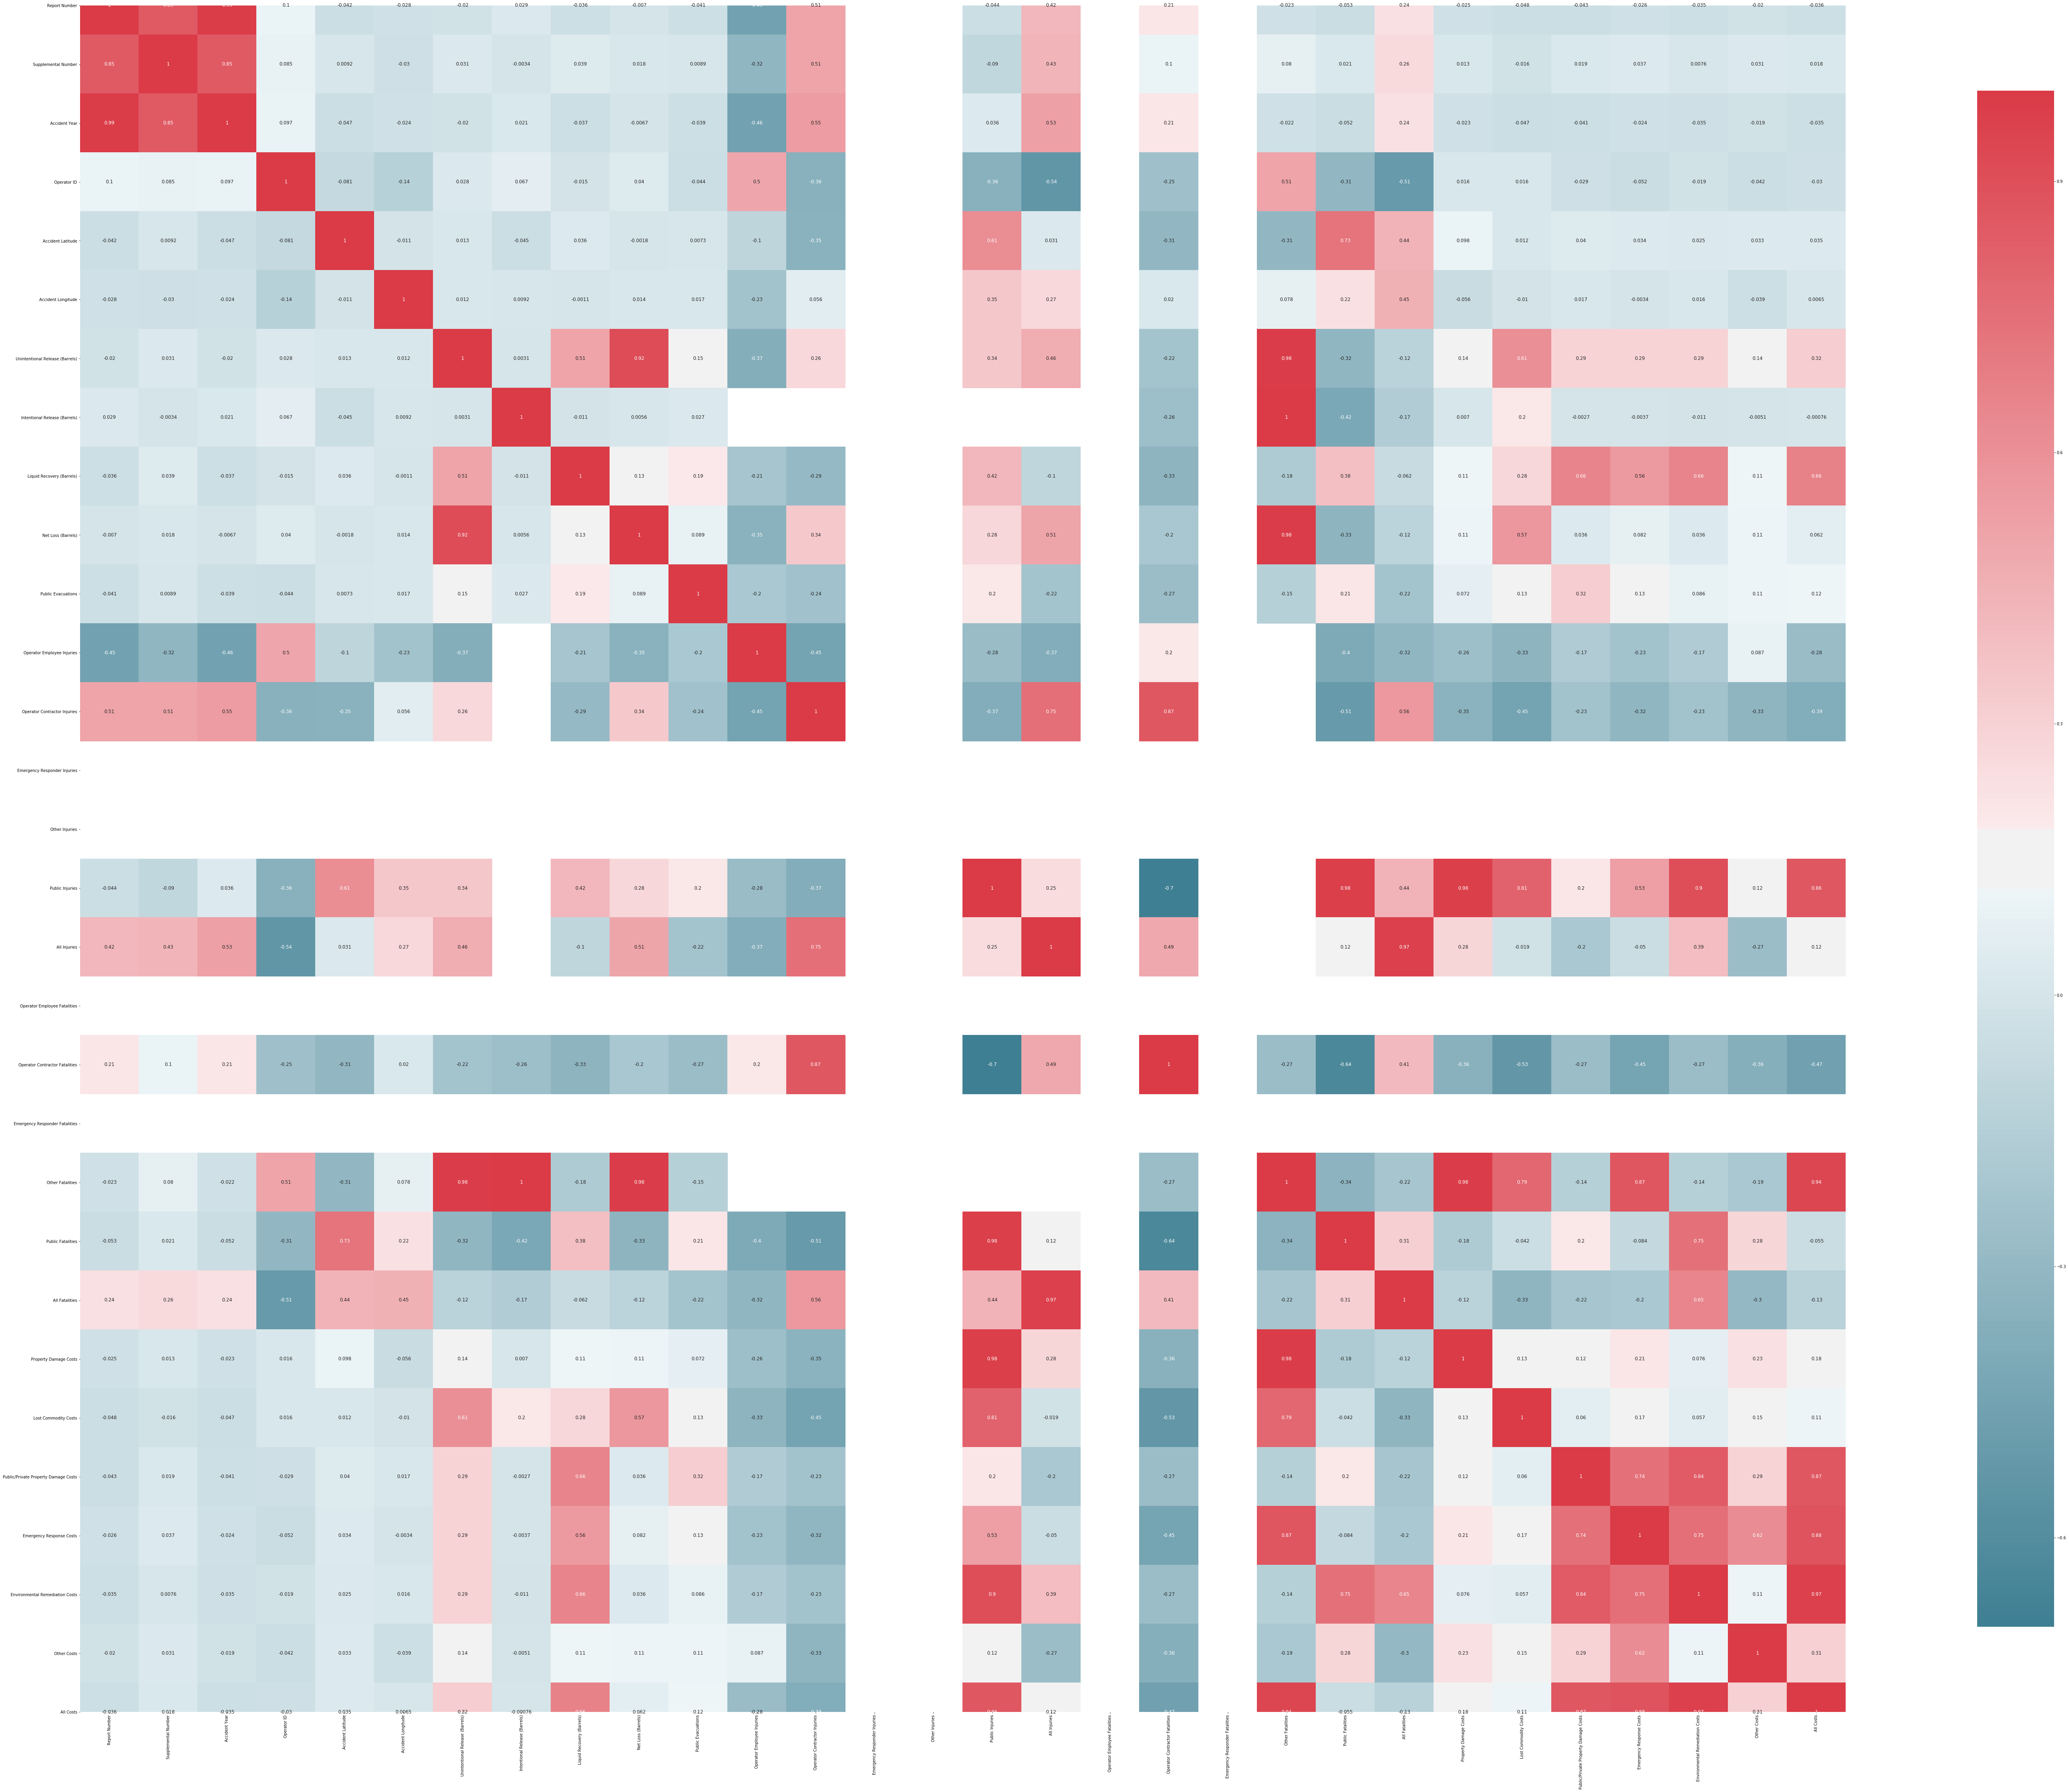

In [12]:
## Lets look at all the cross correlations here to see what factors can be causal on others etc.
          
Oilpipeline_1.plot_correlation_map(data)

In [4]:
data_liq_type = data[Liquid_Type];
data[Liquid_Type].unique()

array(['HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS', 'CRUDE OIL',
       'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID',
       'CO2 (CARBON DIOXIDE)',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

In [5]:
uniq_data_liquid_types = data_liq_type.unique()

In [11]:
# Trying to answer the Questions :

In [37]:
# Net barrel loss by liquid type
LiquidDamage = data.groupby(Liquid_Type)[Net_Loss_Barrels].sum().sort_values(ascending=False)

In [38]:
LiquidDamage

Liquid Type
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS              251938.68
CRUDE OIL                                                62605.21
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       46816.96
CO2 (CARBON DIOXIDE)                                      8121.52
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)         0.00
Name: Net Loss (Barrels), dtype: float64

In [35]:
## how many accidents by liquid occurrence :
data[Liquid_Name].describe()


count         222
unique         69
top       PROPANE
freq           26
Name: Liquid Name, dtype: object

In [56]:
# most accidents by liquid type (name) :
pd.set_option("display.max_rows", None)
data[Liquid_Name].value_counts()[:MEDIUM_ROW_NUMS]

PROPANE                                     26
ETHANE                                      24
Y-GRADE                                     23
ETHYLENE                                    17
PROPYLENE                                   15
CONDENSATE                                  13
NATURAL GASOLINE                            12
BUTANE                                      11
ISOBUTANE                                    4
DILUTE PROPYLENE                             4
VACUUM GAS OIL                               3
NAPHTHA                                      3
REFINERY GRADE PROPYLENE (RGP)               3
ETHANE/PROPANE MIX                           3
Y GRADE                                      3
ETHANE/PROPANE                               3
14# NATURAL GASOLINE                         2
ETHANE/PROPANE BLEND                         2
ISO-BUTANE                                   1
ACETIC ACID                                  1
98.7% ETHANE, .97% METHANE, .36% PROPANE     1
VINYL ACETATE

## More for answering Q1.

#### So , seeems to be the most flammable liquids like Ethane,propane , Ethylene and condenstaes which 
#### help cause accidents.
#### These are all LPG - i.e hydrocarbons. Their chemical composition is only that of carbon and hydrogen atoms.

#### Also when they are pure , rather than mixed this is clearly an issue, as mixtures at most cause 3 accidents over these years,
#### whereas all pure liquids begining at Butane cause accidents in the tens , starting with Butane at 11 accidents alone !




In [81]:
# Do this by Cost :
Liquid_name_AllCost_count_series = data.groupby(Liquid_Name)[All_Costs].sum().sort_values(ascending=False)
Liquid_name_AllCost_count_series[:MEDIUM_ROW_NUMS]

Liquid Name
ETHYLENE                                    30168191
ETHANE                                      10142813
NATURAL GASOLINE                             9330100
NAPHTHA                                      6224130
CONDENSATE                                   3157053
PROPANE                                      2993626
PROPYLENE                                    2634977
RAW FEED                                     1599786
VINYL ACETATE MONOMER                        1470000
Y-GRADE                                      1138850
Y GRADE                                      1080897
BUTANE                                        882229
ETHANE/PROPANE MIX                            791290
REFINERY GRADE BUTANE                         721188
ISOBUTANE                                     672137
DILUTE PROPYLENE (PROPYLENE/PROPANE MIX)      632830
NO 6 FUEL OIL                                 437000
14# NATURAL GASOLINE                          432463
VACUUM GAS OIL                    

In [82]:
# Do this by Oil loss :
data.groupby(Liquid_Name)[Net_Loss_Barrels].sum().sort_values(ascending=False)[:MEDIUM_ROW_NUMS]

Liquid Name
ETHANE                                      67030.37
ETHANE/PROPANE MIX                          18491.00
RAW FEED                                    13718.00
PROPANE                                     10591.84
ETHANE/PROPANE                               5003.10
ETHYLENE                                     3542.90
PROPANE/BUTANE MIX                           3283.00
Y-GRADE                                      2876.39
NATURAL GASOLINE                             2552.56
ISOBUTANE                                    2504.10
NORMAL BUTANE                                2237.00
PROPYLENE                                    1021.42
ISO BUTANE                                    770.00
98.7% ETHANE, .97% METHANE, .36% PROPANE      580.00
VINYL ACETATE MONOMER                         445.27
VACUUM GAS OIL                                389.00
BUTANE                                        191.90
NAPHTHA                                       132.00
Y GRADE                           

In [32]:
# Do this by Oil loss :
#pd.set_option("display.max_rows", None)
data.groupby(Liquid_Name)[All_Fatalities].sum().sort_values(ascending=False)

# Data is too sparse along this All_fatalities (also All_injuries) to make anything near a conclusion from

#### When running these counts per specific Liquid Name , namely counts for accidents , all costs and Net barrel loss - Ethane
#### is at the top or near , and other liquid crudes like propane Ethylene and butane always feature in the top ten or lower rankings here. I.e These liquids are all associted at least
#### with higher costs per accident and oil loss, not only that but they also are associated with the most accidents.

#### This must be to do with their physical properties and chemical composition.

#### This will be further investigated below.



In [16]:
Liquid_name_Accident_count_series = data[Liquid_Name].value_counts()

In [65]:
data[Cause_Category].value_counts()

MATERIAL/WELD/EQUIP FAILURE    1435
CORROSION                       592
INCORRECT OPERATION             378
NATURAL FORCE DAMAGE            118
ALL OTHER CAUSES                118
EXCAVATION DAMAGE                97
OTHER OUTSIDE FORCE DAMAGE       57
Name: Cause Category, dtype: int64

In [54]:
data[Cause_Subcategory].value_counts()[:MEDIUM_ROW_NUMS];

In [33]:
data[Pipeline_Type].value_counts()

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

In [34]:
data[Pipeline_Location].value_counts()

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

## Answering Q.1, 

### The results here clearly demonstarte that liquids which are not mixed - pure flammable ones like Etane, Propane etc are involved in the worst accidents,
#### combining this with the 'Material failure' data - which has material - ie liquid as the worst offender, its seems to be at least strongly correlated with 
#### the use of these materials/liquid inside the pipelines alone.


#### It can be seen here clearly that, for the Pipeline type, about 50% of all accidents occur for the above ground pipelines .
#### ~ 1/3 of this for underground and much less so for tank and transition area respectively.

#### For Pipeline location - Onshore pipelines account for the vast majority of accidents - 2777/2795 ~ 99% of cases.

## Lets list the relevant Physical and chemical properties of liquids :

### Physical:
    
###  1) density
###  2) viscosity

### 3) vapour pressure. 
### 4) API [American petroleum Institute] - gravity (this is related to relative density)

### 5) specific heat capacity
### 6) surface tension
    





## Chemical composition :

### 1) PAHs
### 2) Sulphur content - 'sweet' or 'sour' crudes.

#### These components make fluids more falammable (sulphur content as one example) and hydrocarbons like PAHs .

#### Thus the sulphur content should be  low, both sweet crude and the sour form are separated by a sulphur content
#### @ a 1% value.


In [101]:
data[data[Liquid_Type] == 'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS'][Liquid_Subtype].value_counts()

LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    188
OTHER HVL                                                   171
ANHYDROUS AMMONIA                                            55
Name: Liquid Subtype, dtype: int64

In [27]:
# Try to look at the liquid type and subtype together in a more visual way :
#create a crosstab to dig deeper into the reasons. 
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(data['Liquid Type'], data['Liquid Subtype'], margins=True).style.background_gradient(cmap = cm)


Liquid Subtype,ANHYDROUS AMMONIA,BIODIESEL,"DIESEL, FUEL OIL, KEROSENE, JET FUEL",GASOLINE (NON-ETHANOL),LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID),MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE),OTHER,OTHER HVL,All
Liquid Type,,,,,,,,,
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS),0,2,0,0,0,0,0,0,2
"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",55,0,0,0,188,0,0,171,414
"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",0,0,408,376,0,98,51,0,933
All,55,2,408,376,188,98,51,171,1349


In [ ]:
# The crosstab graphic just further illuminates that it is in fact the LPGs and the 'other hazardous' which are specofically 
# by subtype the most prominently accident prone

# For chemical compposition...,

# Most crudes contain PAH's - hydrocarbons and some sulphur(sweet <1%, sour > 1% classification)

In [6]:
#As discussed above let's look at Some densities and viscosities etc. of some
#of the liquids mentioned here in this dataset :

# 13 cells above I rank the liquid subtypes by the no. of accidents occuring with them , 
#Some of the most 'accident prone' were  Ethane, propane, BUtane, ETHYLEN, propylene etc.

#below these most liquids were only associated with single digit accidents - such as : 
#ETHANE (80%) PROPANE (20%) MIX 
#ACETIC ACID
#BUTADIENE 
#Propane/propylene mix ?
# Use the function "density_mix" in the script to copmute a mix of densities
Propane_propylene_density = Oilpipeline_1.density_mix(1.88,1.74, 0.5)
Propane_propylene_density

3.614585635359116

In [9]:
##Look up the densities of these in liquid state all @ 25 degrees celcius . (Reference : Wikipedia)
## units are Kg/m^3:

## High accidents associated liquids
hi_accident_densities = {'ETHANE' : 1.25,
                         'PROPANE': 1.88, 'BUTANE' : 2.49, 'ETHYLENE': 1.18, 'PROPYLENE' : 1.74}
    

## Low accidents associated liquids
lo_accident_densities = {'ETHANE (80%) PROPANE (20%) MIX'  : 3.416, # - calc done with (weighted version of) the formula for mixing
    #densities as in the function in my class.
'ACETIC ACID' : 1.052, 'PROPANE / PROPYLENE MIXTURE': Propane_propylene_density}



In [69]:
# Lets translate this to no. accidents as a function of density and plot
accident_counts_hi = []
indexes_hi         = []
for key in hi_accident_densities.keys():
    print(key)
    #accident_counts.append(data[data[Liquid_Name] == key].count())
    accident_counts_hi.append(Liquid_name_Accident_count_series[key])
    indexes_hi.append(hi_accident_densities[key])
    
accident_counts_lo = []
indexes_lo         = []
print(lo_accident_densities)
for key in lo_accident_densities.keys():
    print(key)
    #accident_counts.append(data[data[Liquid_Name] == key].count())
    accident_counts_lo.append(Liquid_name_Accident_count_series[key])
    indexes_lo.append(lo_accident_densities[key])

    
    

ETHANE
PROPANE
BUTANE
ETHYLENE
PROPYLENE
{'ETHANE (80%) PROPANE (20%) MIX': 3.416, 'ACETIC ACID': 1.052, 'PROPANE / PROPYLENE MIXTURE': 3.614585635359116}
ETHANE (80%) PROPANE (20%) MIX
ACETIC ACID
PROPANE / PROPYLENE MIXTURE


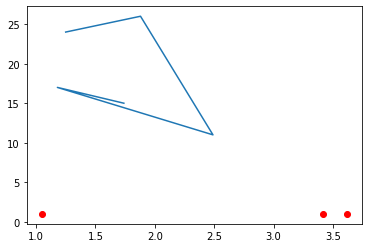

In [22]:
plt.plot( indexes_hi, accident_counts_hi);
plt.plot( indexes_lo, accident_counts_lo,"ro");
plt.show()

### The values I found dont seem reliable  here , 

#### but The density cut-off should be about 1.0 g/cm^3 (or that equivalemt to an API gravity of 10 @ 100 degrees F) 

#### Encourage the use of mixtures of liquids as opposed to the pure versions is another piece of advice I would give.

#### Api gravity values I found on 'https://www.engineeringtoolbox.com/' did not seem to match up with what I expected either
#### they were quoted inconsistently - at different temperatures and sometimes for the gaseous states, other times liquid states.
#### hi_accident_api_gravities = {'ETHANE' : 247, 'PROPANE': 241, 'BUTANE' : 235, 'ETHYLENE': 128, 'PROPYLENE' : }
    
#### In summary what I was going to do here would be to find a reliable values (all at the same temp., pressure & using the same units.
#### and finally all quoted with the chemical in a liquid state) .In addition a database/.csv file is necesary for reproducibilty of this analysis
#### and proper automation.
#### I think also it's possible that trying to classify the hazardous materials each by a single pyhsical property may be a little
#### too simple/naive and if given more time & a reliable dataset I would have tried to examine surface plots (3-D) of Eg. Costs VS. Density and vapor pressure etc.
#### so instead of separating dangerous and non dangerous liquid_property values by a single line it would be done with plane cutting the 3-D surface. Also similarly for (viscosity, APi gravity ) pairs and so on..



In [79]:
#  this would have made more sense if it was done 

# Lets translate this to no. accidents as a function of density and plot
accident_costs_hi = []
indexes_hi         = []
for key in hi_accident_densities.keys():
    print(key)
    # scale these large cpsts by a factor of 1*10^6
    accident_costs_hi.append(Liquid_name_AllCost_count_series[key] / 10E6)
    indexes_hi.append(hi_accident_densities[key])
    
accident_costs_lo = []
indexes_lo         = []
print(lo_accident_densities)
for key in lo_accident_densities.keys():
    print(key)
    # scale these large cpsts by a factor of 1*10^6
    accident_costs_lo.append(Liquid_name_AllCost_count_series[key] / 10E6)
    indexes_lo.append(lo_accident_densities[key])
    
# # scale these large cpsts by a factor of 1*10^6
#accident_costs_hi  
#accident_costs_lo

ETHANE
PROPANE
BUTANE
ETHYLENE
PROPYLENE
{'ETHANE (80%) PROPANE (20%) MIX': 3.416, 'ACETIC ACID': 1.052, 'PROPANE / PROPYLENE MIXTURE': 3.614585635359116}
ETHANE (80%) PROPANE (20%) MIX
ACETIC ACID
PROPANE / PROPYLENE MIXTURE


[0.0018677, 0.013003, 0.0033286]

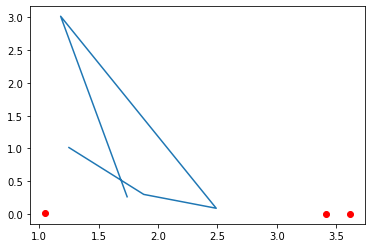

In [80]:
plt.plot( indexes_hi, accident_costs_hi);
plt.plot( indexes_lo, accident_costs_lo,"ro");
plt.show()

In [ ]:
# Lets look at vapour pressures:
    
#     liquid      temp(celcius)  Vapour pressure
#     Butane      25             0.601
#     Ethane      -89            0.572       
#     Propane     25             0.495
#     Ethylene                   6.944
#     isopropane   
#     Ethylene    20             1.246
#     Naphtha     15             0.667
    
    
    
#   Reference : https://www.binmaster.com/_resources/dyn/files/75340090z876d0c14/_fn/Specific+Gravity.pdf  

### I did not have time to find reliable valiues here and do an analysis.

### But some research into the main offenders in the 'All Costs' analysis, the HVLs -  Highly volatile liquids are hazardous liquids which will form a vapor cloud when released to the atmosphere and which has a vapor pressure exceeding 276 kPa (40 psia) at 37.8 °C (100 °F) 

### For example the worst liquid offender on that list - "Ethylene" has a far higher than 40PSi @ 100 F.

## Thus a recommendation here would be to limit any liquids or mixtures to having vapour pressures @ 100F to below 40 psi.


In [ ]:
# Lets Look at viscosities:
# Reference :   

# high (environmental) cost liquids
#     liquid      temp(celcius)  Dynamic Viscosity Pa·s * 10^-6
#     Butane      25             7.28 
#     Ethane      -89            9.21     
#     Propane     25             8.02 
#     Ethylene    20             10.28
#     isobutane                  7.55   

# Low Cost liquids
# Naphtha     20             223


In [1]:
#Due to v little data here , I think one way to make a recommendation to limit the damage caused due to 
# oil properties would be to only use those with a dynamic viscosity over 10 (*10^-6)  Pa*secs

## Introduce a time dependence to the analysis 


In [14]:

new_data = data[data[Accident_Year] != 2017];
accidents_per_year = new_data[Accident_Year].value_counts().sort_index();
accidents_per_year;

In [15]:
Accidents_Year_shifted_ints = accidents_per_year.astype(int)

In [16]:
plot_df = pd.DataFrame( {'times':list(Accidents_Year_shifted_ints.index), 'No. Accidents':list(Accidents_Year_shifted_ints.values)} )

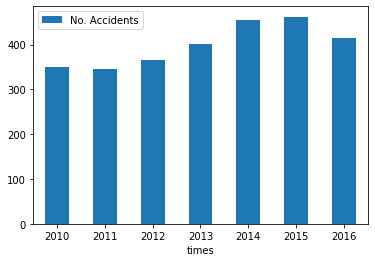

In [17]:
ax = plot_df.plot.bar(x='times', y='No. Accidents',rot=0)

### The change in no. of pipeline accidents has trended slightly upwards almost monotonically every year from 2010 at its peak in 2015.
### This looks to me like people in the industry making the decisions have NOT got any better since 2010 at preventing these accidents.

In [103]:
data[data[Liquid_Type] == 'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS'].groupby(Liquid_Subtype)[Net_Loss_Barrels].sum().sort_values(ascending=False)

Liquid Subtype
OTHER HVL                                                   133846.94
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    115707.56
ANHYDROUS AMMONIA                                             2350.83
Name: Net Loss (Barrels), dtype: float64

In [49]:
# the number of these accidents that were recorded officially as involving a liquid explosion
data[data['Liquid Explosion'] == 'YES'].shape[0]


15

No handles with labels found to put in legend.


True

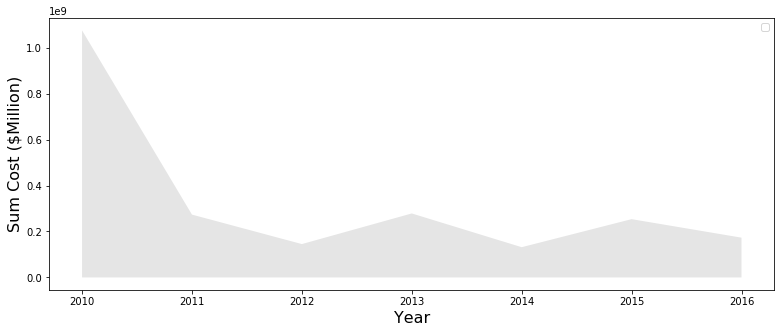

In [13]:
Oilpipeline_1.time_cost_model_n_plot(data, remove_year=[2017])

No handles with labels found to put in legend.


True

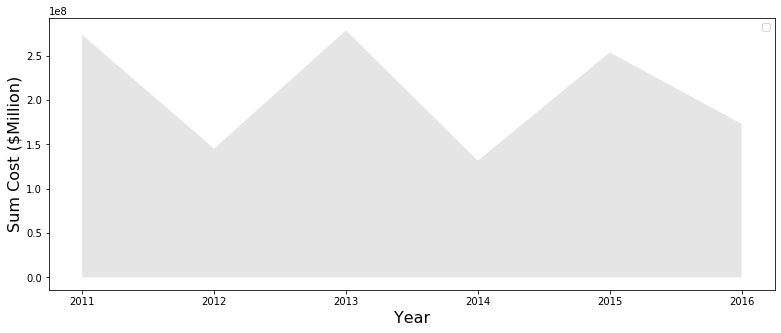

In [18]:
Oilpipeline_1.time_cost_model_n_plot(data, remove_year=[2010,2017])

#### In this plot of the Accident sums, medical costs (All_costs column), I first removed the year 2010 as it contained "outlier"
#### costs and also 2017 as only partial data was available and so was unrepresentative.
#### the results plot of all costs summed per year shows a pretty overall flat trend where its varies about an average of ~ $2 Million to ~ 2.5 mill. and 1.5 mill bucks.

#### In conclusion, given that the costs have not improved or worsened then the people in charge of recommendations over the last decade have not got better at reducing these accidents
####  and related costs

In [ ]:
THanks for listening . David
Round of applause ;) Cheers